In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://github.com/numpy/numpy/blob/v1.26.0/numpy/lib/function_base.py#L3238
def win(n, arr):
    b = np.arange(1-n, n, 2)
    c = [(-1)**k*a*np.cos(2*np.pi*k*b/(n-1)) for k,a in enumerate(arr)]
    return np.sum(c, axis=0), b, c 

# https://github.com/pytorch/pytorch/blob/main/torch/signal/windows/windows.py#L643
def win2(n, arr):
    constant = 2*np.pi / (n-1)
    k = np.linspace(0, (n-1)*constant, n)
    a_i = np.array([(-1) ** i * w for i, w in enumerate(arr)])
    i = np.arange(a_i.shape[0])
    return (np.expand_dims(a_i, axis=-1) * np.cos(np.expand_dims(i, axis=-1) * k)).sum(0)

# https://github.com/pytorch/pytorch/blob/main/torch/signal/windows/windows.py#L643
def win3(n, arr):
    constant = 2*torch.pi / (n-1)
    k = torch.linspace(0, 2*torch.pi, n)
    a_i = torch.tensor([(-1) ** i * w for i, w in enumerate(arr)])
    i = torch.arange(a_i.shape[0])
    win = (a_i[:,None] * torch.cos(i[:,None] * k)).sum(0)
    return win

In [3]:
from scipy.signal.windows import general_cosine
from scipy.fft import fft, fftshift

In [4]:
def visualize_window(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2, sr=16000):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    n_cycles = sr//length
    A = np.fft.fft(window, length*n_cycles)/ (length/2) 
    freq = np.fft.fftfreq(len(A),d=n_cycles/length*2) 
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [0,0.5]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

In [6]:
length = 512

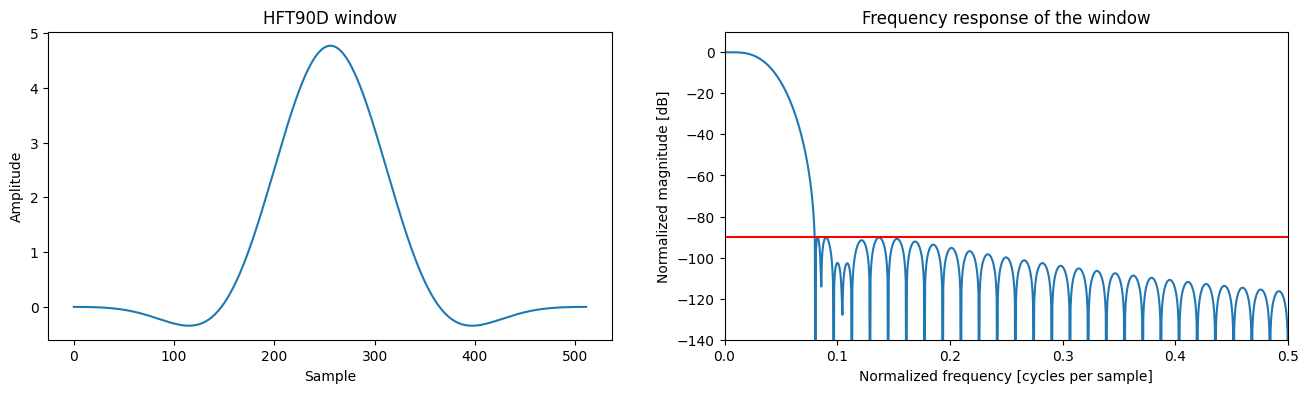

In [7]:
visualize_window(general_cosine(length, 
                        [1, 1.942604, 1.340318, 0.440811, 0.043097], sym=False), 
                        'HFT90D', sr=16000)

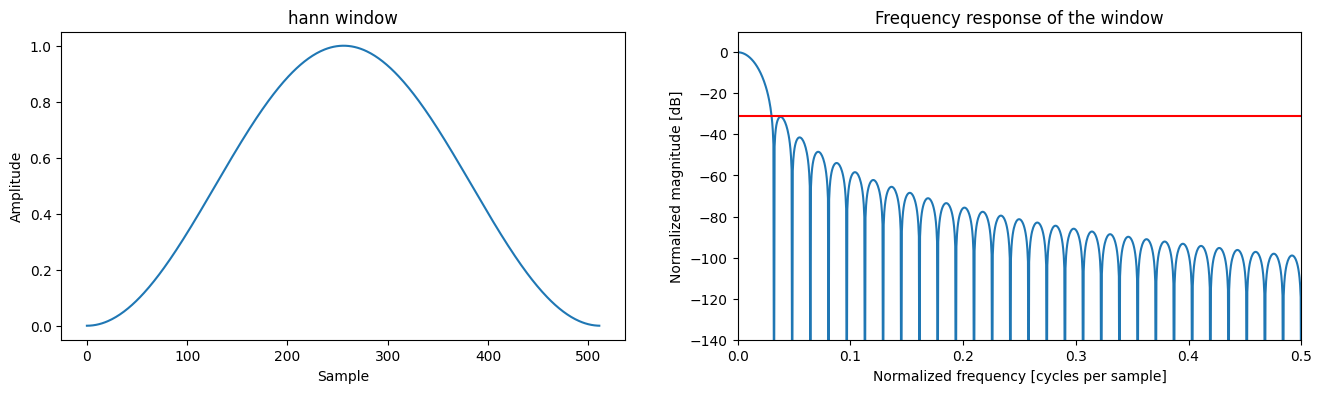

In [8]:
visualize_window(general_cosine(length, 
                        [0.5,0.5], sym=False),
                        'hann', f_xhighlight=-31)

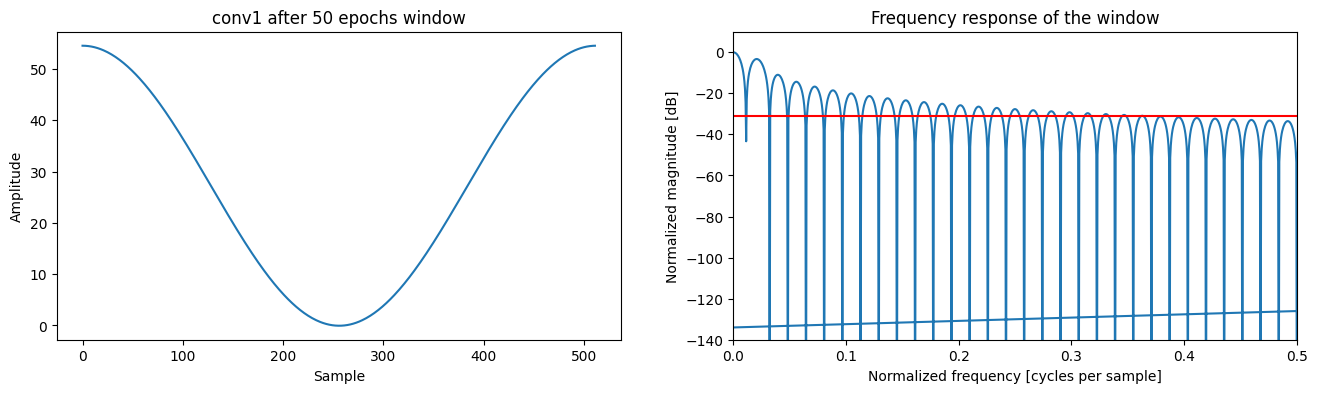

In [9]:
visualize_window(general_cosine(length, 
                        [ 27.2411, -27.3043], sym=False),
                        'conv1 after 50 epochs', f_xhighlight=-31)

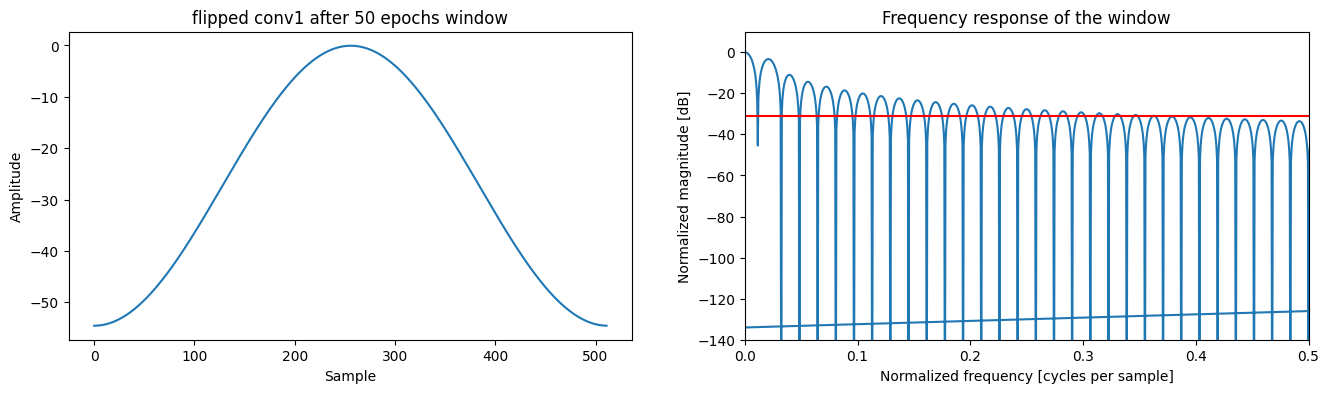

In [11]:
visualize_window(general_cosine(length, 
                        [-27.3043,  27.2411], sym=False),
                        'flipped conv1 after 50 epochs', f_xhighlight=-31)

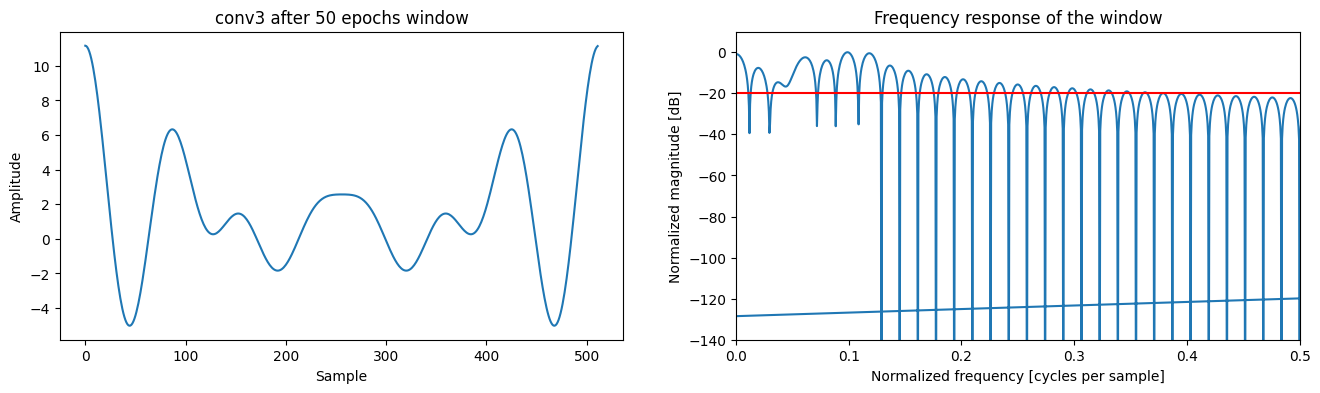

In [12]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'conv3 after 50 epochs'
visualize_window(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20)

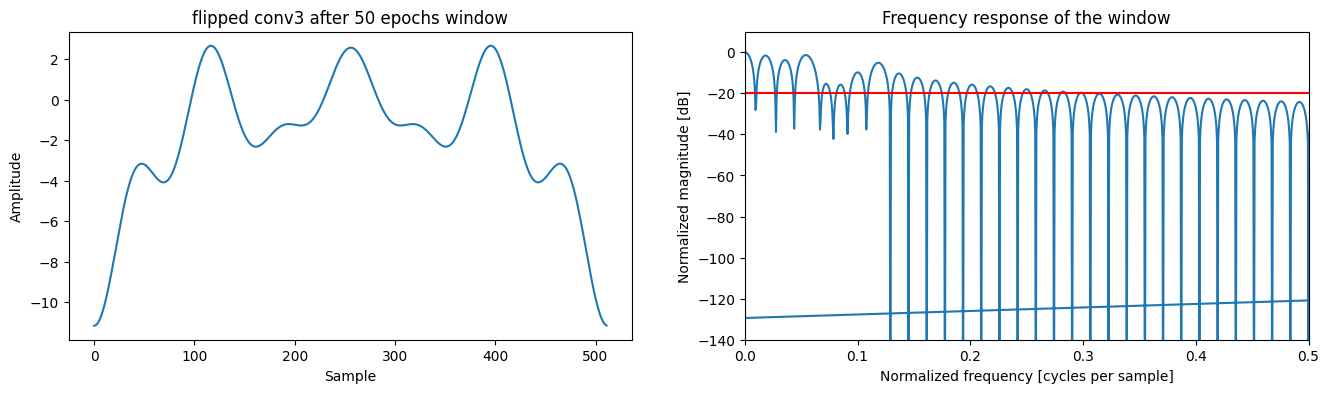

In [13]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'flipped conv3 after 50 epochs'
visualize_window(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20)

In [18]:
def visualize_window2(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2, sr=16000):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    window = np.fft.fftshift(window)
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    n_cycles = sr//length
    A = np.fft.fft(window, length*n_cycles)/ (length/2) 
    freq = np.fft.fftfreq(len(A),d=n_cycles/length*2) 
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [0,0.5]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

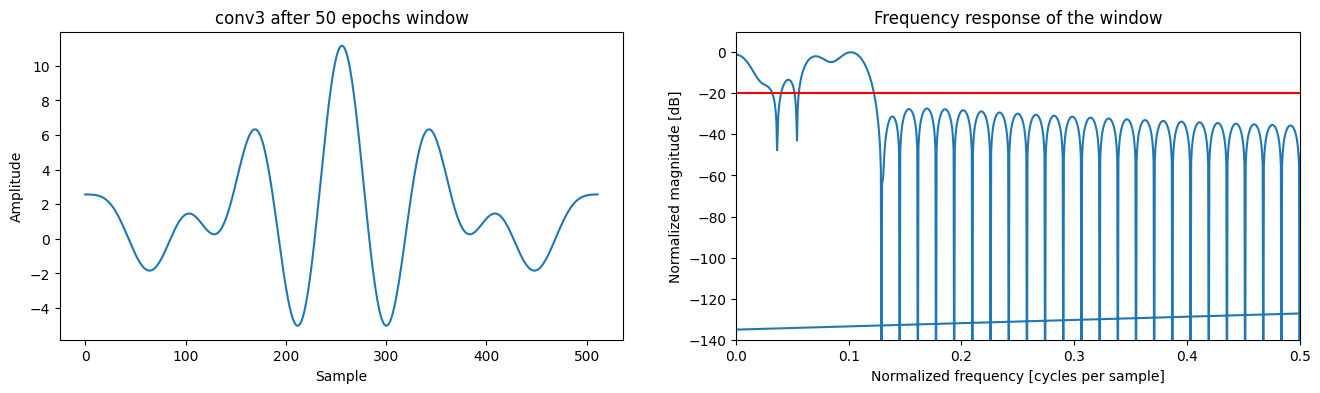

In [21]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'conv3 after 50 epochs'
visualize_window2(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20)

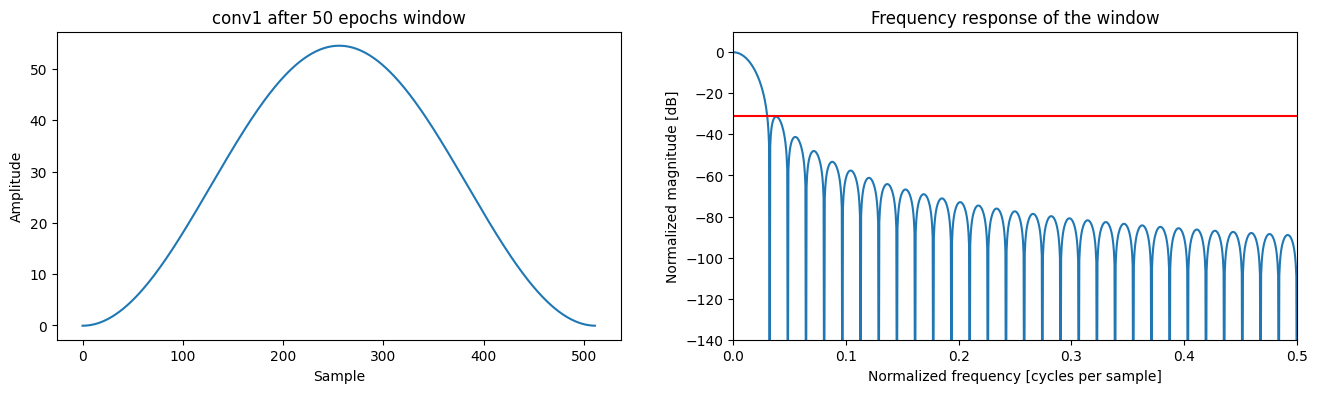

In [22]:
visualize_window2(general_cosine(length, 
                        [ 27.2411, -27.3043], sym=False),
                        'conv1 after 50 epochs', f_xhighlight=-31)

In [23]:
def visualize_window3(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    A = np.fft.fft(window, length*10)/length
    freq = np.fft.fftfreq(len(A),d=1/length)/length
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [-50/length, 50/length]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

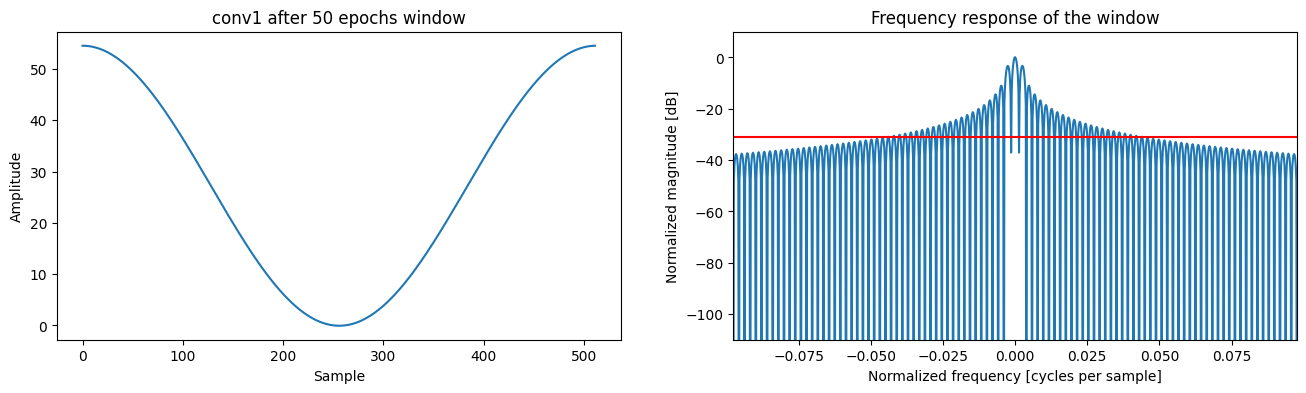

In [26]:
visualize_window3(general_cosine(length, 
                        [ 27.2411, -27.3043], sym=False),
                        'conv1 after 50 epochs', f_xhighlight=-31, f_ylim=[-110,10])

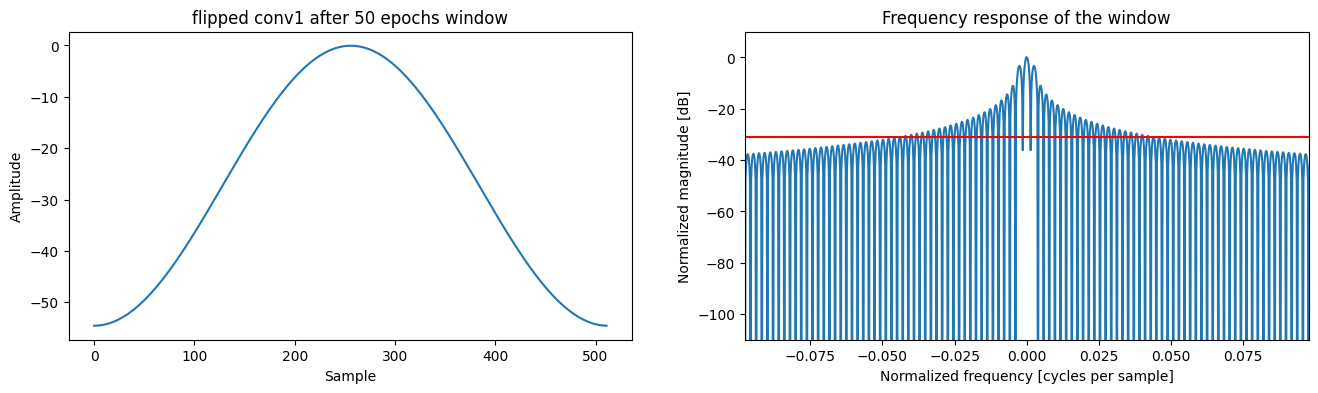

In [27]:
window_coeffs = [ 27.2411, -27.3043]
title = 'flipped conv1 after 50 epochs'
visualize_window3(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-31, f_ylim=[-110,10])

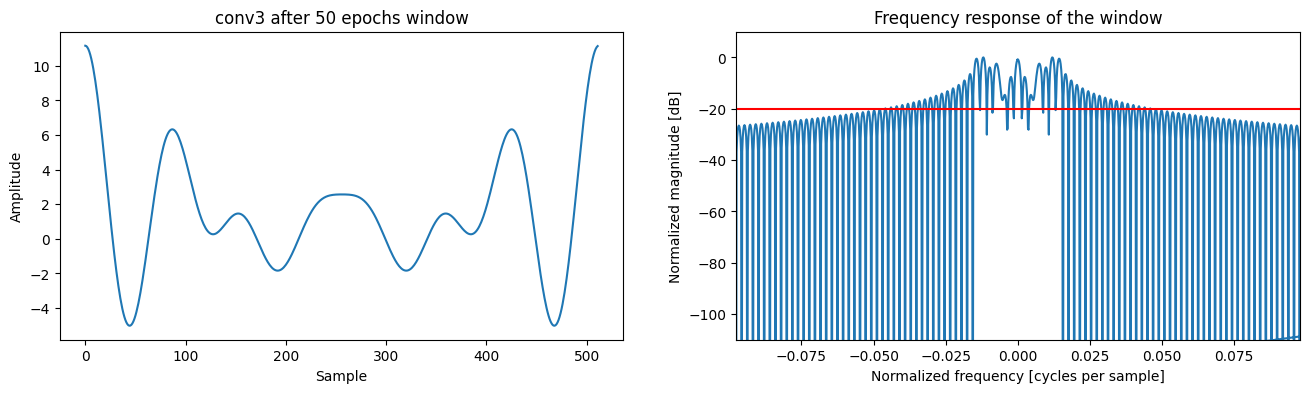

In [29]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'conv3 after 50 epochs'
visualize_window3(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

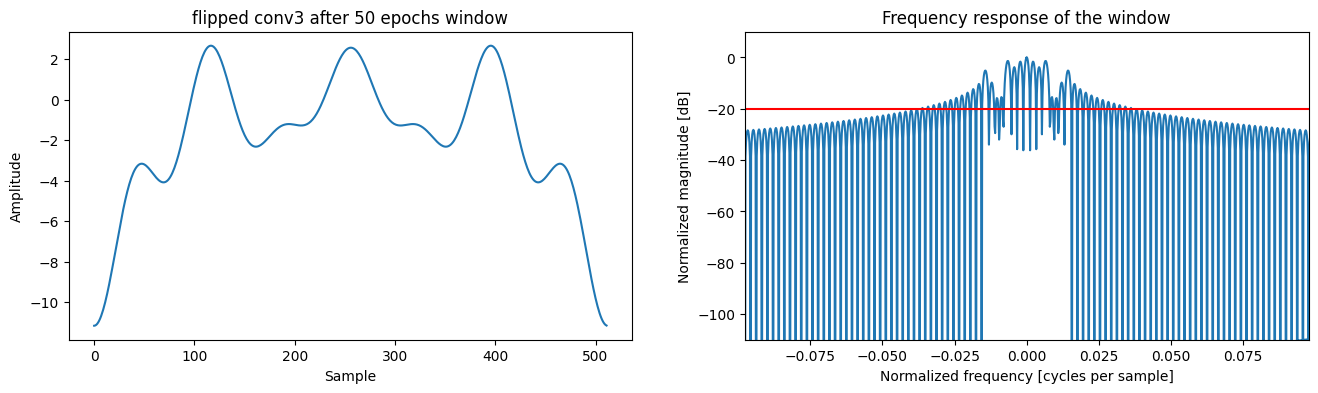

In [30]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'flipped conv3 after 50 epochs'
visualize_window3(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

In [31]:
def visualize_window4(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    window = np.fft.fftshift(window)
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    A = np.fft.fft(window, length*10)/length
    freq = np.fft.fftfreq(len(A),d=1/length)/length
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [-50/length, 50/length]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

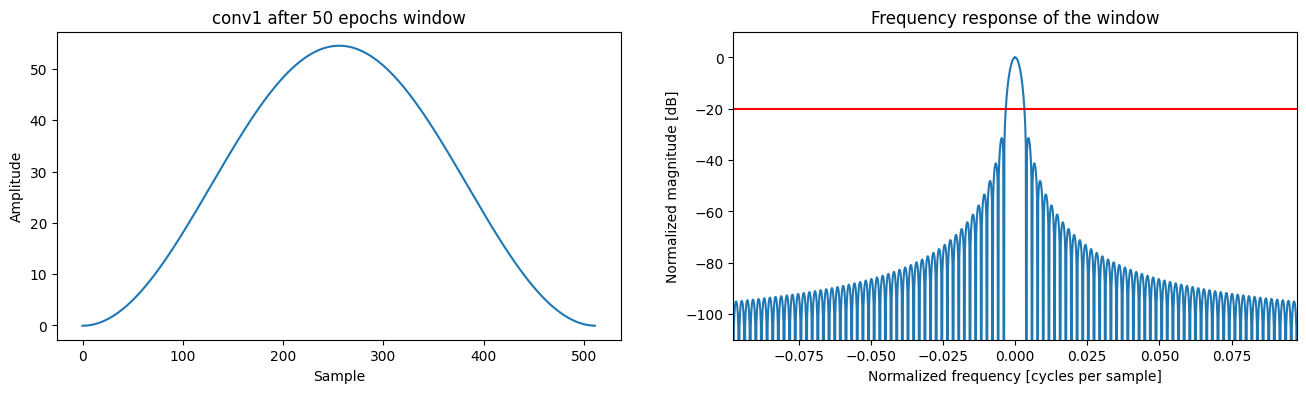

In [33]:
window_coeffs = [ 27.2411, -27.3043]
title = 'conv1 after 50 epochs'
visualize_window4(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

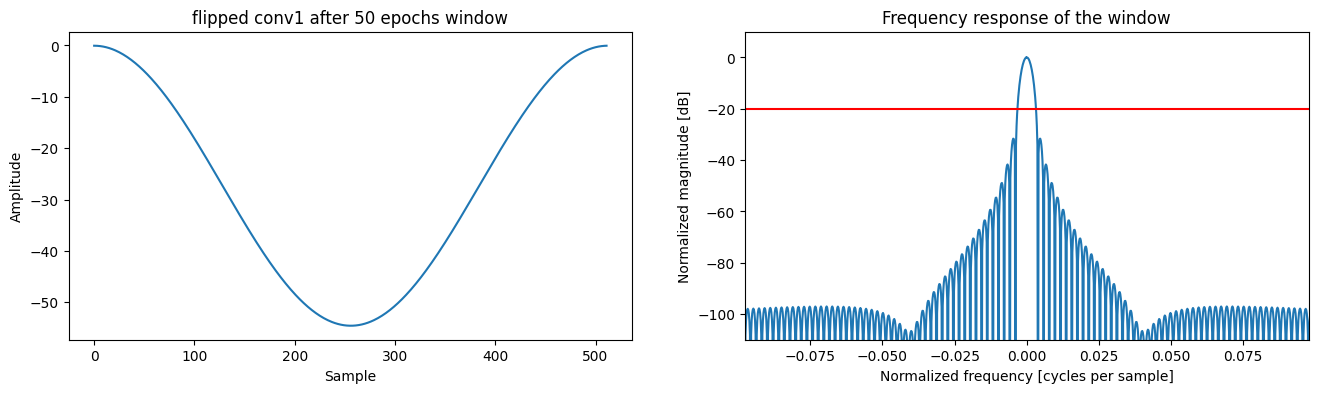

In [34]:
window_coeffs = [ 27.2411, -27.3043]
title = 'flipped conv1 after 50 epochs'
visualize_window4(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

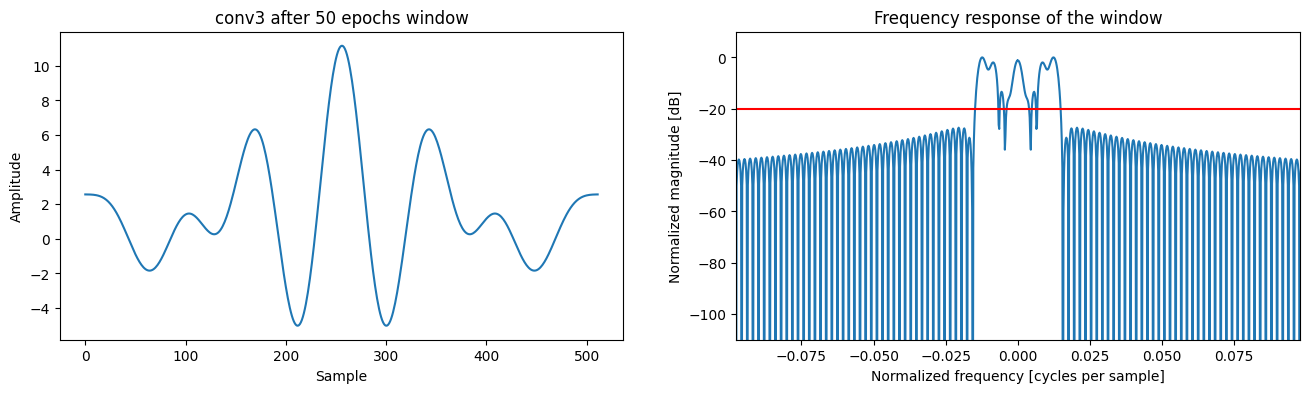

In [35]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'conv3 after 50 epochs'
visualize_window4(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

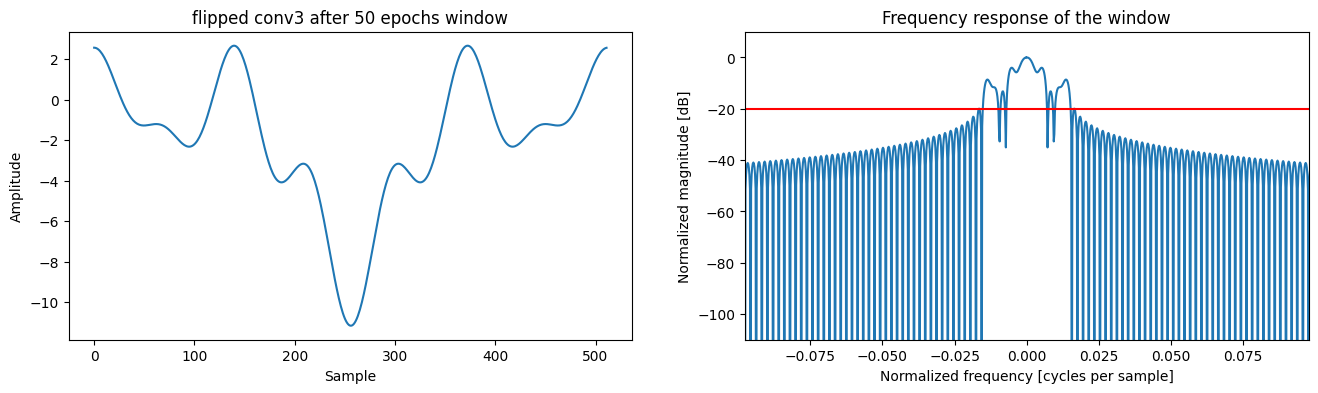

In [36]:
window_coeffs = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
title = 'flipped conv3 after 50 epochs'
visualize_window4(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

In [65]:
def get_window_cosine(kernel_size, window_params):
    window_k = len(window_params)
    k = np.linspace(0, 2*np.pi, kernel_size)
    i = np.expand_dims(np.arange(window_k), axis=-1)
    window = (np.expand_dims(window_params, axis=-1) * (-1)**i * np.cos(i * k)).sum(0)
    return window

In [101]:
def visualize_window5(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    A = np.fft.fft(window, length*10)
    freq = np.fft.fftfreq(len(A),d=1/2) 
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [0, 100/length]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    

(5120,) (512,)


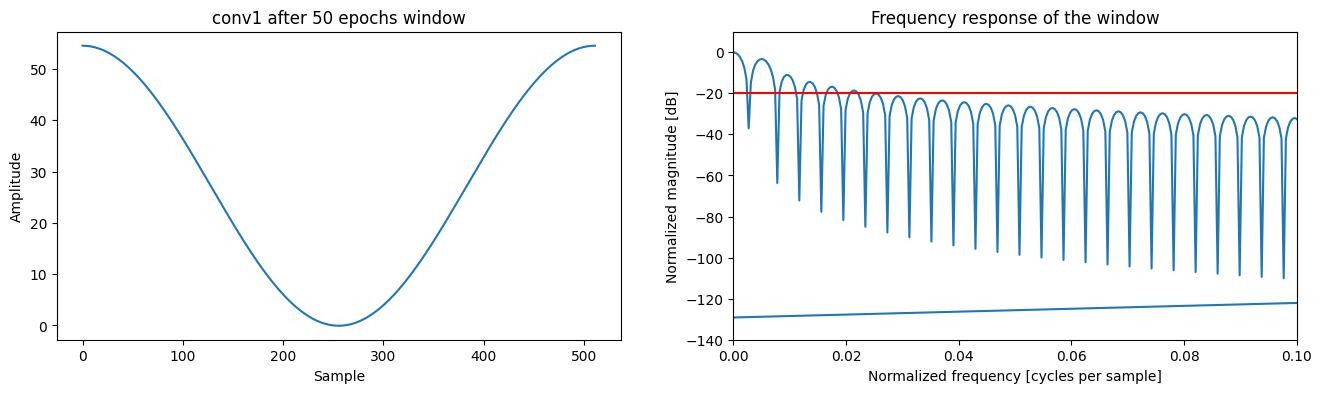

In [223]:
def visualize_window55(window, window_name="", f_xlim=None, f_ylim=None, f_xhighlight=-90.2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    axes[0].plot(window)
    axes[0].set_title(f"{window_name} window")
    axes[0].set_ylabel("Amplitude")
    axes[0].set_xlabel("Sample")

    length = len(window)
    A = np.fft.fft(window, length*10)
    freq = np.fft.fftfreq(len(A),d=1/2) 
    response = np.abs(A / np.abs(A).max())
    response = 20 * np.log10(np.maximum(response, 1e-10)) # to dB
    if not f_xlim:
        f_xlim = [0, 100/length]
    if not f_ylim:
        f_ylim = [-140, 10]
    axes[1].set_xlim(f_xlim)
    axes[1].set_ylim(f_ylim)
    axes[1].plot(freq, response)
    axes[1].set_title("Frequency response of the window")
    axes[1].set_ylabel("Normalized magnitude [dB]")
    axes[1].set_xlabel("Normalized frequency [cycles per sample]")
    axes[1].axhline(f_xhighlight, color='red')
    print(response.shape, window.shape, sep=' ')

window_coeffs = [ 27.2411, -27.3043]
title = 'conv1 after 50 epochs'
window = get_window_cosine(length, window_coeffs)
# window = np.fft.fftshift(window)
visualize_window55(window, title, f_xhighlight=-20, 
                  f_ylim=[-140,10], f_xlim=[0, 0.1])

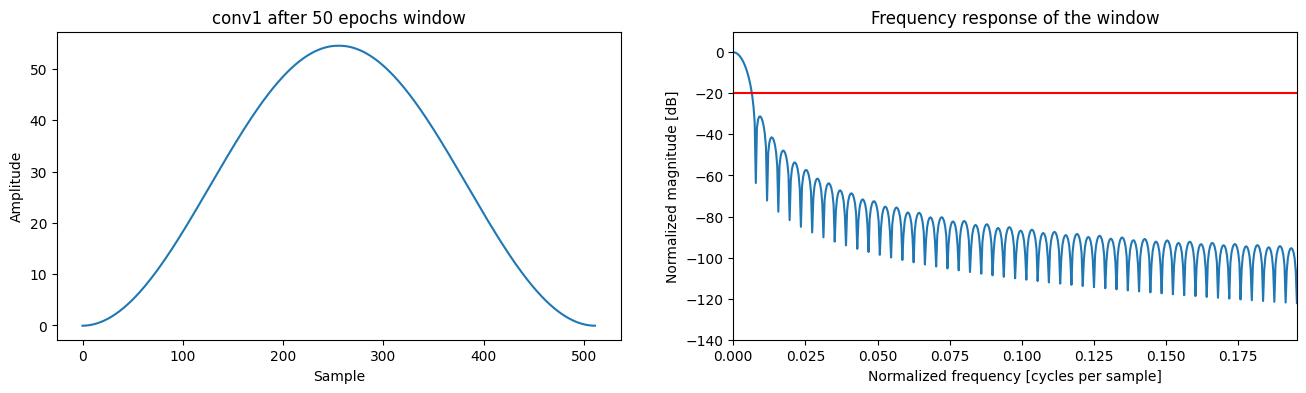

In [103]:
window_coeffs = [ 27.2411, -27.3043]
title = 'conv1 after 50 epochs'
window = get_window_cosine(length, window_coeffs)
# window = np.fft.fftshift(window)
visualize_window5(window, title, f_xhighlight=-20, 
                  f_ylim=[-140,10], f_xlim=[0, 100/length])

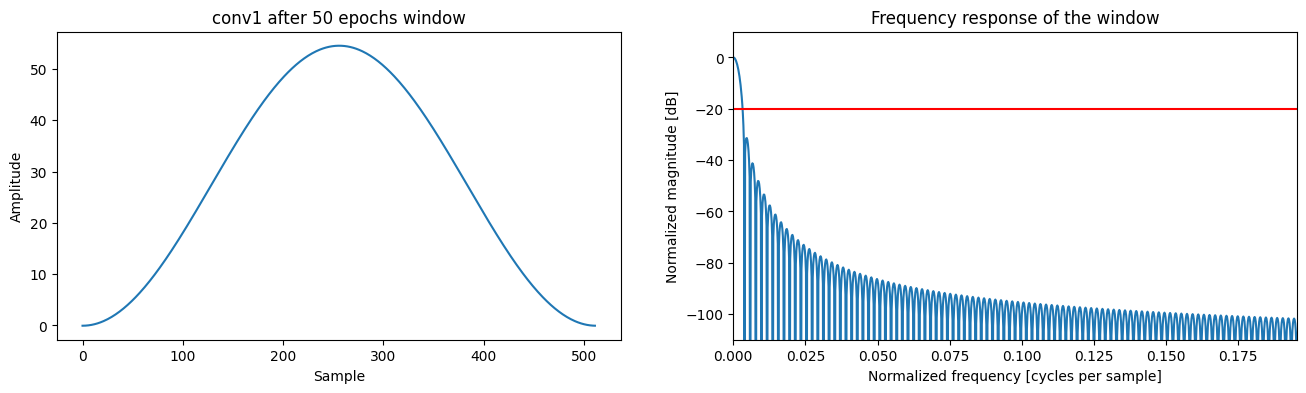

In [56]:
window_coeffs = [ 27.2411, -27.3043]
title = 'conv1 after 50 epochs'
visualize_window5(general_cosine(length, 
                        window_coeffs, sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

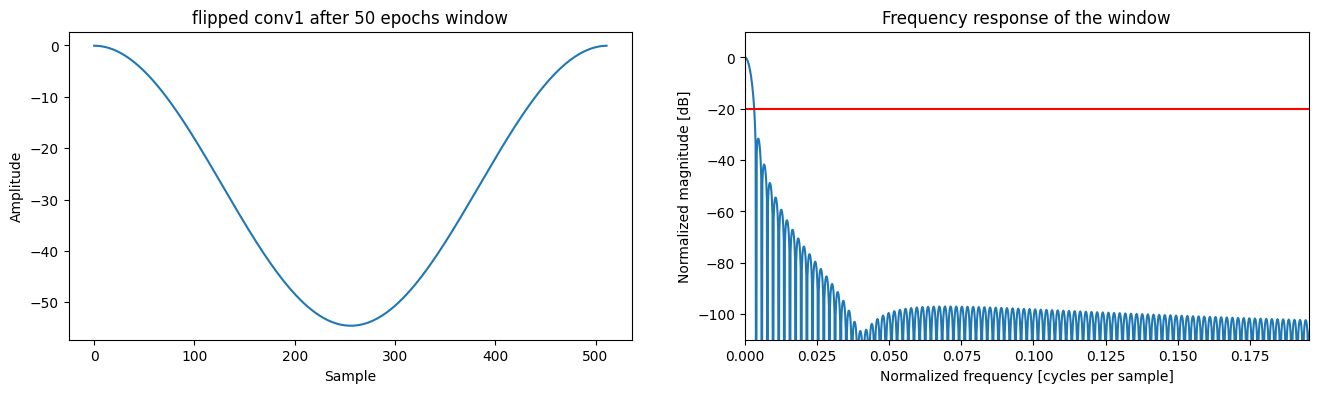

In [57]:
window_coeffs = [ 27.2411, -27.3043]
title = 'flipped conv1 after 50 epochs'
visualize_window5(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

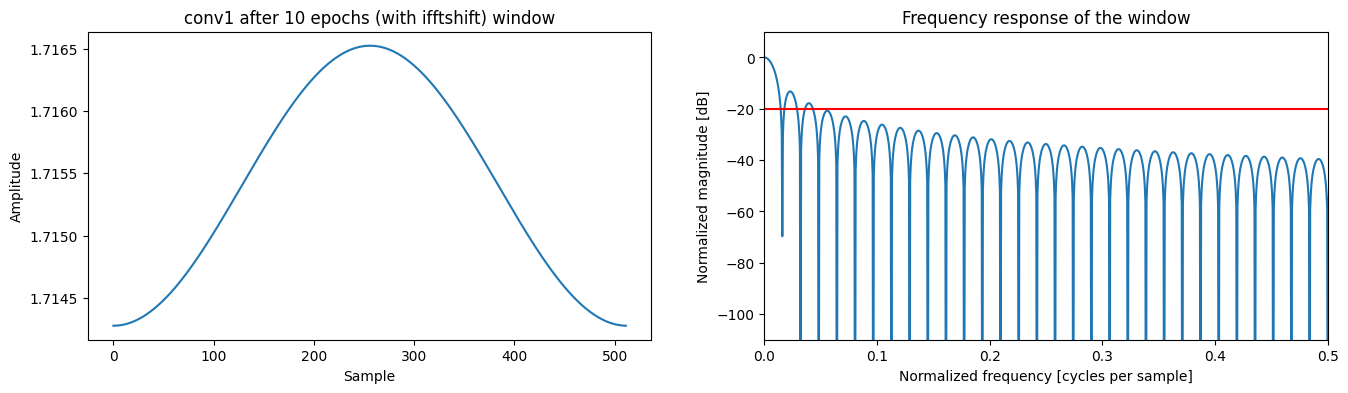

In [191]:
window_coeffs = [1.1246e-03, 1.7154e+00]
title = 'conv1 after 10 epochs (with ifftshift)'
visualize_window(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

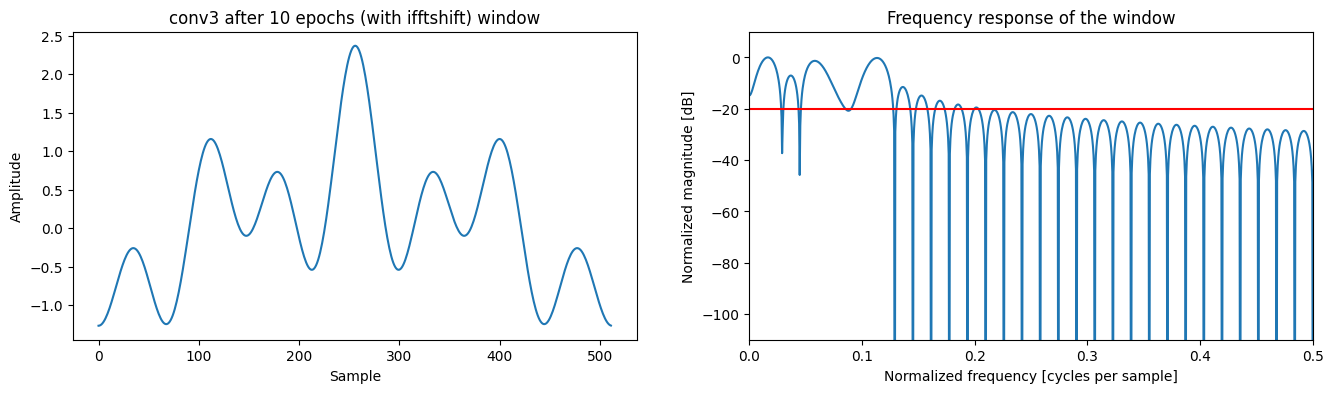

In [192]:
window_coeffs = [ 0.7191,  0.1760,  0.1057,  0.5091,  0.2576, -0.1992,  0.7372,  0.0669]
title = 'conv3 after 10 epochs (with ifftshift)'
visualize_window(general_cosine(length, 
                        window_coeffs[::-1], sym=False),
                        title, f_xhighlight=-20, f_ylim=[-110,10])

In [105]:
from scipy import signal as signal

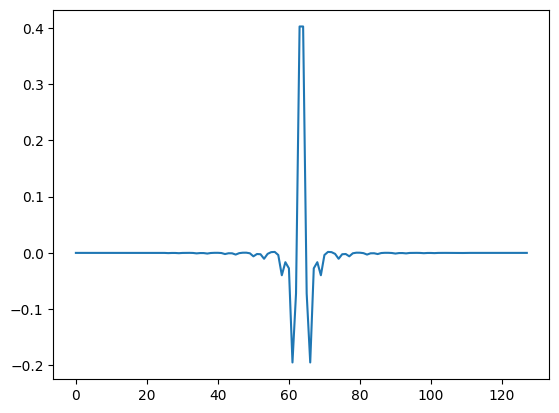

In [107]:
window = signal.firwin2(128, [0.,.25,.5,.75,1.],[0.,1.,1.,0.,0.])
plt.plot(window)

In [109]:
import scipy

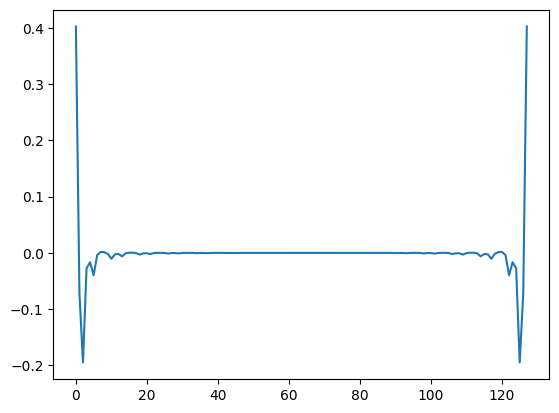

In [111]:
plt.plot(scipy.fftpack.ifftshift(window))

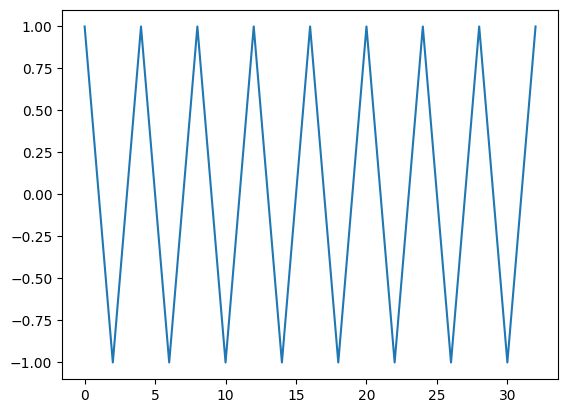

In [135]:
x = np.linspace(0.,1.,33)
shift = np.exp(-(33-1)/2.*1.j*np.pi*x)
plt.plot(shift)

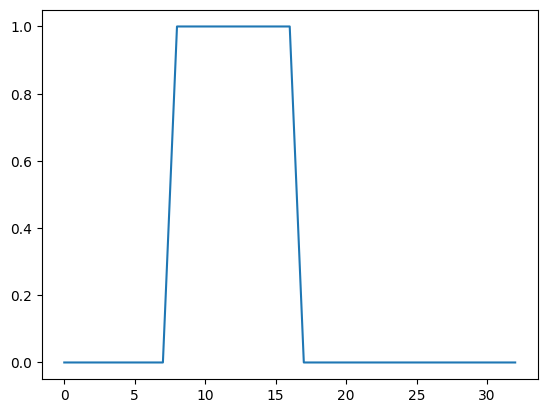

In [136]:
fx = np.where((x>=0.25) & (x<=0.5), 1., 0.)
plt.plot(fx)

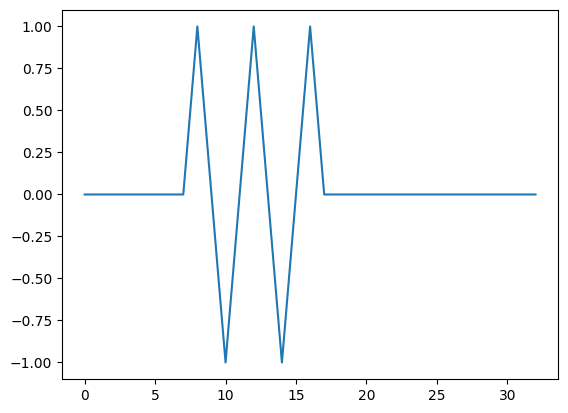

In [137]:
plt.plot(fx*shift)

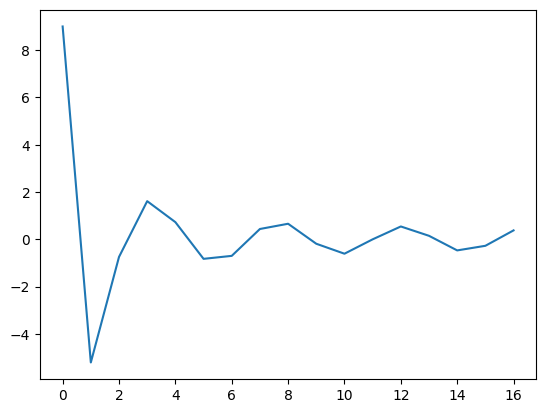

In [138]:
plt.plot(np.fft.rfft(fx,n=33))

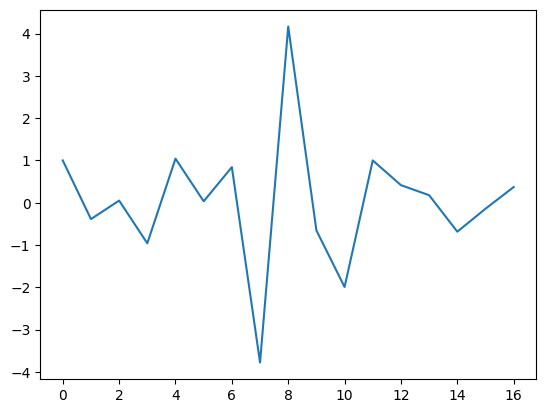

In [139]:
plt.plot(np.fft.rfft(fx*shift,n=33))

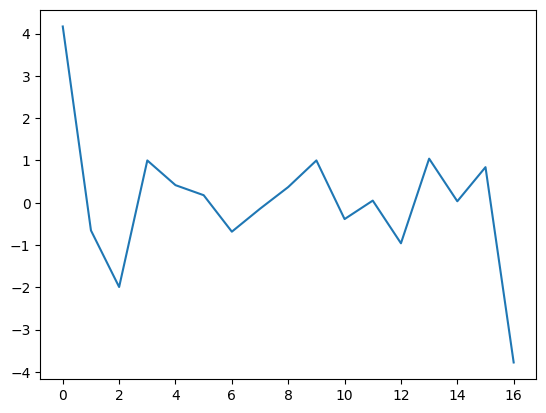

In [140]:
plt.plot(np.fft.ifftshift(np.fft.rfft(fx*shift)))

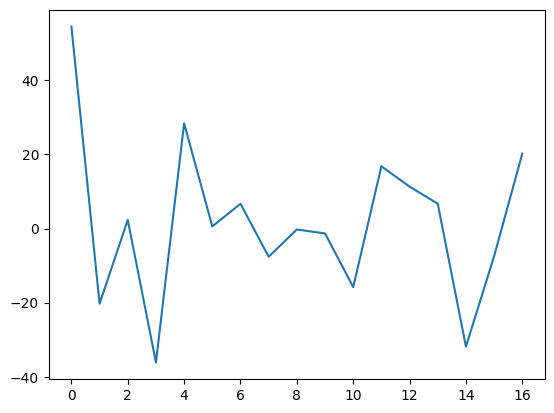

In [142]:
plt.plot(general_cosine(17,[ 27.2411, -27.3043])*np.fft.rfft(fx*shift,n=33))

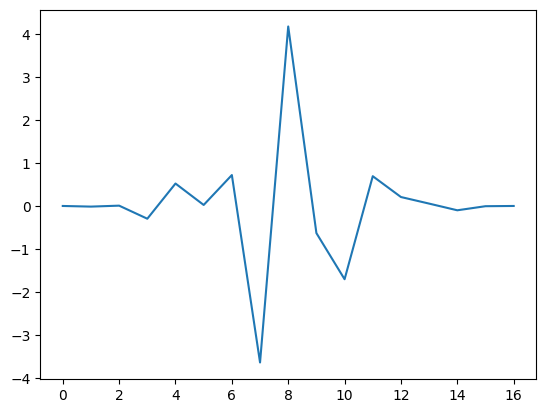

In [143]:
plt.plot(general_cosine(17,[0.5,0.5])*np.fft.rfft(fx*shift,n=33))

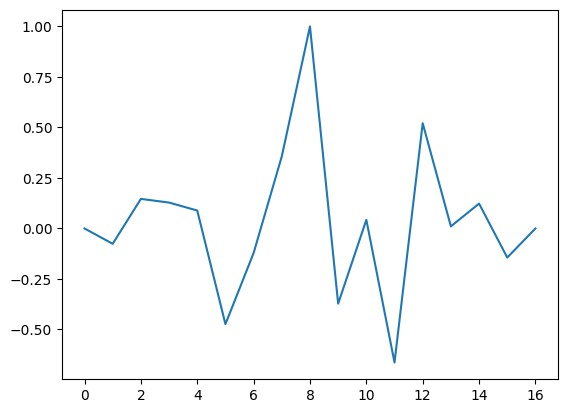

In [144]:
plt.plot(general_cosine(17,[0.5,0.5])*np.fft.fftshift(np.fft.rfft(fx*shift,n=33)))

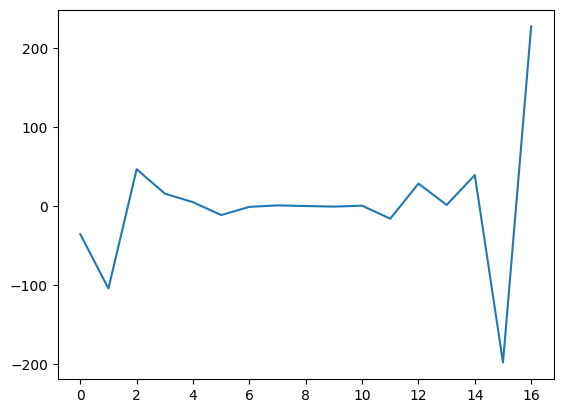

In [145]:
plt.plot(general_cosine(17,[ 27.2411, -27.3043])*np.fft.fftshift(np.fft.rfft(fx*shift,n=33)))

In [ ]:
plt.plot(general_cosine(17,[ 27.2411, -27.3043])*np.fft.fftshift(np.fft.rfft(fx*shift,n=33)))

In [146]:
import math

In [151]:
math.trunc(math.log2(32))

5

In [150]:
2**6

64

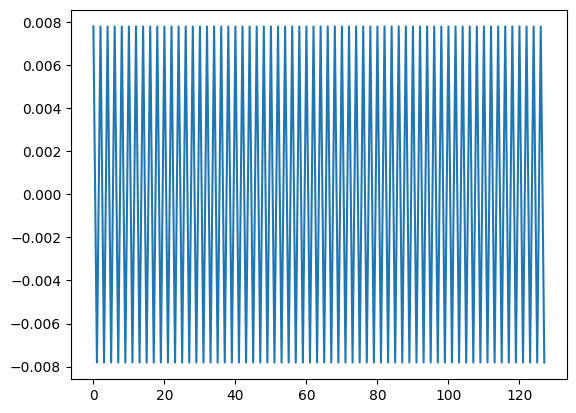

In [180]:
n1 = 128
n2 = int(math.pow(2, math.trunc(math.log2(n1))+1) + 1)
x2 = np.linspace(0.,1.,n2)
shift2 = np.exp(-(n2-1)/2.*1.j*np.pi*x2)
fx2 = np.where((x2>=0.25) & (x2<=0.5), 1., 0.)
fxs2 = np.fft.irfft(fx2*shift2, n=n1)
plt.plot(fxs2)

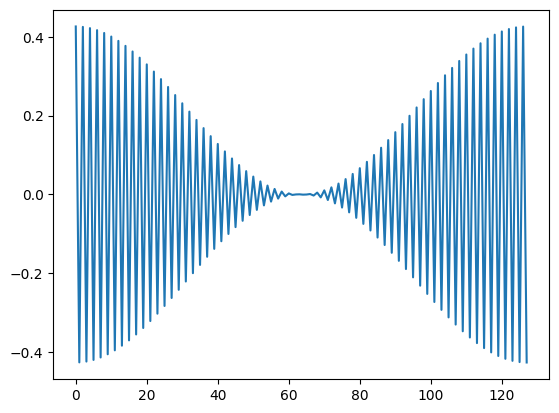

In [181]:
plt.plot(fxs2*general_cosine(n1,[ 27.2411, -27.3043]))

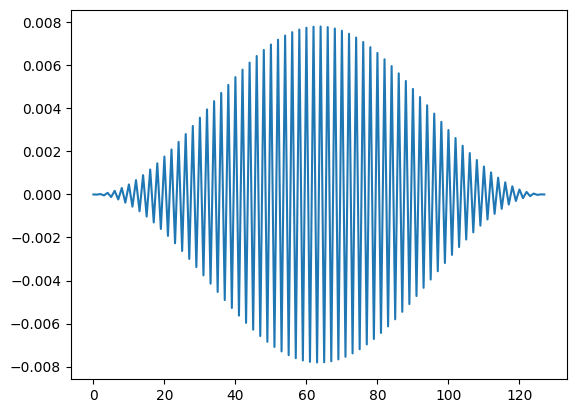

In [182]:
plt.plot(fxs2*general_cosine(n1,[.5,.5]))

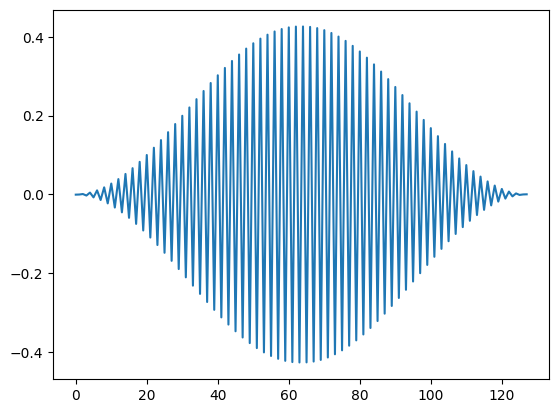

In [183]:
plt.plot(np.fft.ifftshift(fxs2*general_cosine(n1,[ 27.2411, -27.3043])))

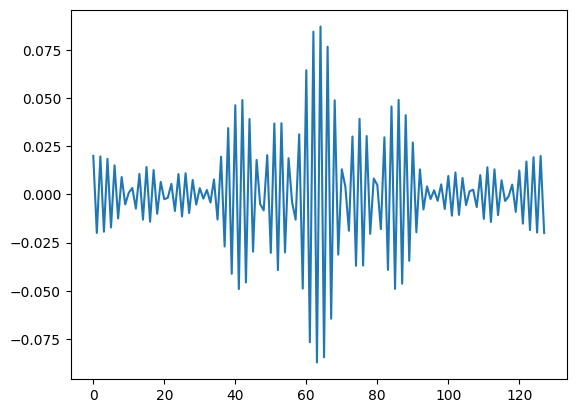

In [184]:
w3 = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
plt.plot(np.fft.ifftshift(fxs2*general_cosine(n1,w3)))

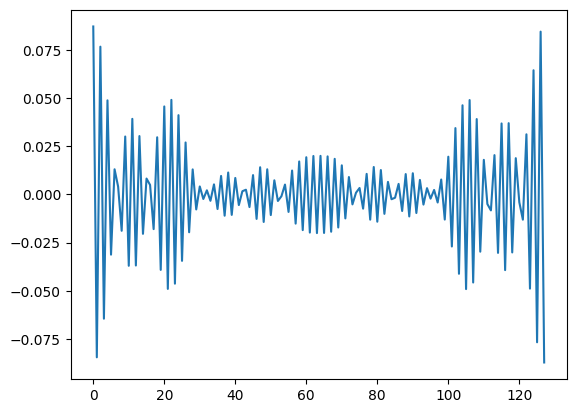

In [185]:
w3 = [ 1.4282, -1.0194,  0.3244,  0.6551,  2.1382, -2.0059,  2.9772, -1.9300]
plt.plot(fxs2*general_cosine(n1,w3))

In [166]:
import torch

In [186]:
t = torch.linspace(0.,1.,n1)
t2 = torch.linspace(0.,1.,n1*2)
torch.allclose(torch.fft.irfft(t, n=n1), torch.fft.irfft(t2, n=n1))

False

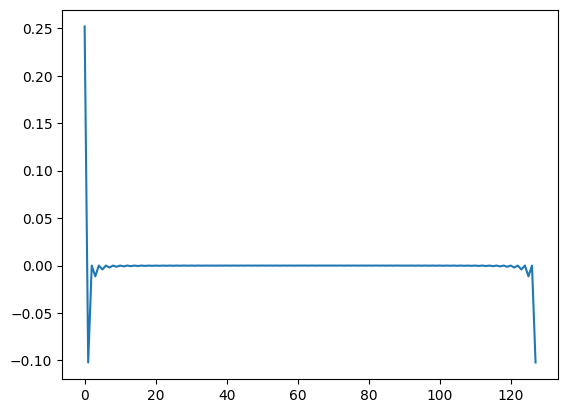

In [187]:
plt.plot(torch.fft.irfft(t, n=n1))

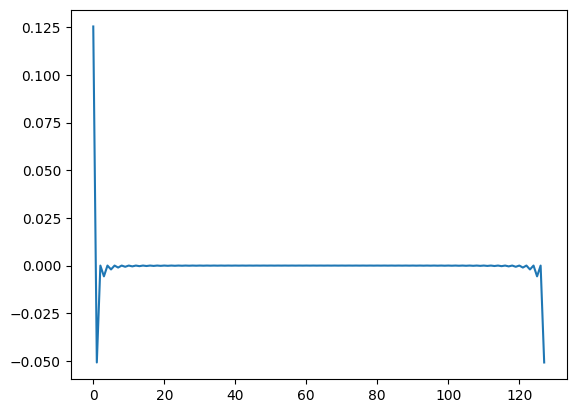

In [188]:
plt.plot(torch.fft.irfft(t2, n=n1))

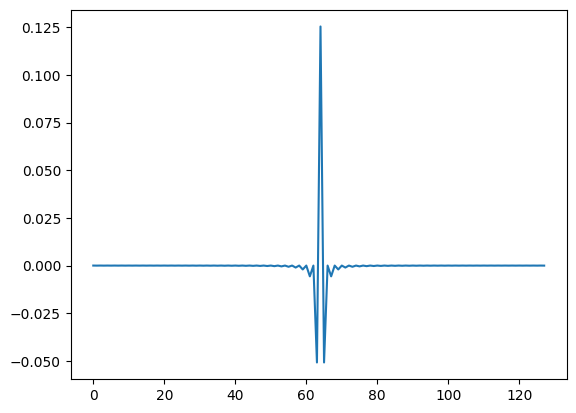

In [190]:
plt.plot(torch.fft.ifftshift(torch.fft.irfft(t2, n=n1)))

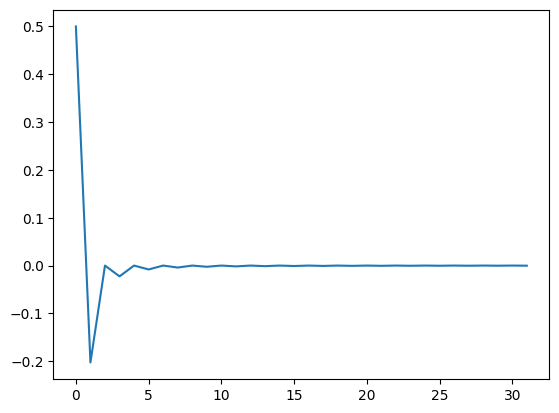

In [173]:
plt.plot(torch.fft.irfft(t2)[:n1])

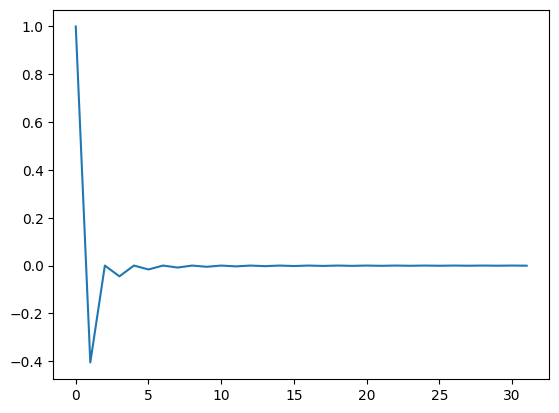

In [175]:
plt.plot(torch.fft.irfft(t2)[:n1]*2)

In [193]:
from einops import rearrange, reduce, repeat

In [196]:
in_channels = 3
out_channels = 5
window_k = 2
kernel_size = 32
window_params = repeat(
    torch.tensor([.54,.46]), 'p -> h c p',
    h=out_channels, c=in_channels)
window_params.shape

torch.Size([5, 3, 2])

In [203]:
# generate general cosine window from win_params
k = torch.linspace(0, 2*math.pi, kernel_size)
i = torch.arange(window_k, dtype=torch.float)[..., None]
window = (window_params[..., None] * (-1)**i * torch.cos(i * k))
print(window.shape)
window = reduce(window, 'h c p k -> h c k', 'sum')
print(window.shape)

torch.Size([5, 3, 2, 32])
torch.Size([5, 3, 32])
